In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [18]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
x1 = x[:, 0]
x2 = x[:, 1]

In [21]:
import plotly.express as px
fig = px.scatter_3d(x=x1, y=x2, z=y)
fig.show()

In [27]:
print(x.shape)
y = y.reshape((x.shape[0], 1))
print(y.shape)

(100, 2)
(100, 1)


In [28]:
X = np.hstack((x, np.ones((x.shape[0], 1))))
X[:5]

array([[ 1.43378429,  1.64447758,  1.        ],
       [-0.11939252,  0.75729811,  1.        ],
       [ 1.72139337,  0.01829604,  1.        ],
       [-1.68319907, -2.37349046,  1.        ],
       [ 0.14451765,  1.13407448,  1.        ]])

In [29]:
theta = np.random.randn(3, 1)
print(theta)

[[-0.67674458]
 [ 0.44531896]
 [ 1.38995332]]


# Modèle

In [30]:
def model(X_, theta_):
    return X_.dot(theta_)

In [31]:
model(X, theta)[:5]

array([[1.1519646 ],
       [1.80799076],
       [0.23315725],
       [1.47208887],
       [1.79717664]])

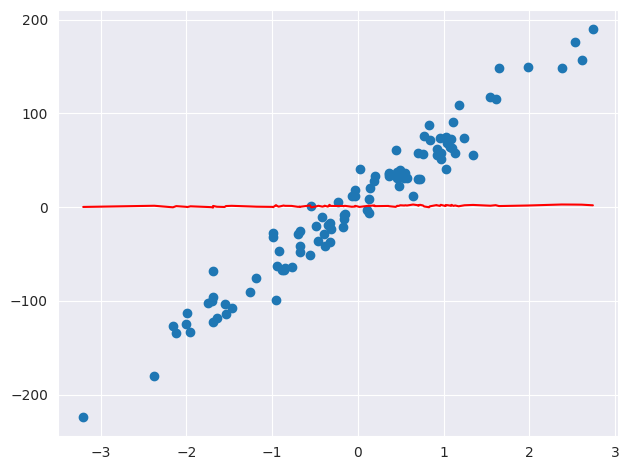

In [45]:
plt.scatter(x2, y)
sns.lineplot(x=x2, y=model(X, theta)[:, 0], color="red")
plt.tight_layout()
plt.show()

# Fonction coût

In [46]:
def cost_function(X_, y_, theta_):
    m = len(y_)
    return 1/2*m + np.sum((model(X_, theta_) - y_)**2)

In [47]:
cost_function(X, y, theta)

np.float64(627359.7452902962)

# Gradient

In [48]:
def grad(X_, y_, theta_):
    m = len(y_)
    return 1/m * X_.transpose().dot(model(X_, theta_) - y_)

# Descente de gradient

In [49]:
def descent_grad(X_, y_, theta_, leaning_rate, n_iteration):
    cost_history_ = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta_ = theta_ - leaning_rate * grad(X_, y_, theta_)
        cost_history_[i] = cost_function(X_, y_, theta_)
    return theta_, cost_history_

# Entraînement du modèle

In [50]:
theta_final, cost_history = descent_grad(X, y, theta, leaning_rate=0.01, n_iteration=500)
theta_final

array([[15.18937038],
       [65.24286687],
       [ 0.59255936]])

In [58]:
predictions = model(X, theta_final)

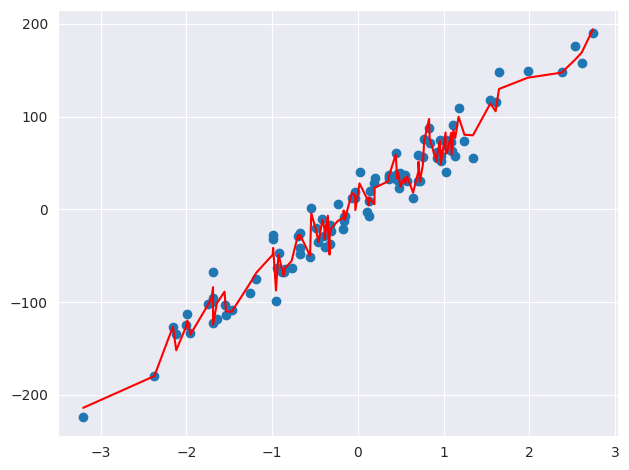

In [59]:
plt.scatter(x2, y)
sns.lineplot(x=x2, y=predictions[:, 0], color="red")
plt.tight_layout()
plt.show()

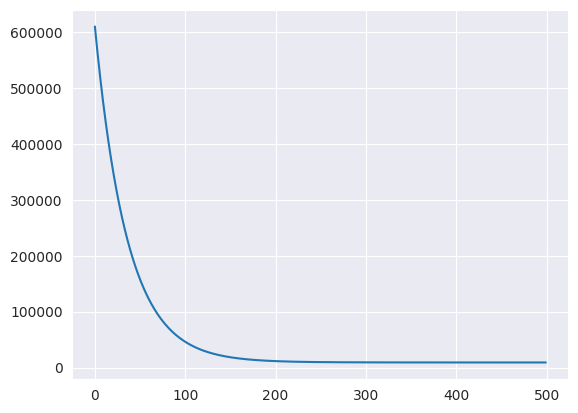

In [60]:
plt.plot(range(500), cost_history)

# Coéfficient de détermination R²

In [61]:
def coef_determination(y_, pred):
    u = np.sum((y_ - pred)**2)
    v = np.sum((y_ - y_.mean())**2)
    return 1 - u/v

In [62]:
coef_determination(y, predictions)

np.float64(0.9857706477600967)